![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture ?? - ICA</center>
### <center> ICA</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/17_Boosting/MainAdaBoost1.ipynb)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

### Example I
#### Generate data
Generate `N=2,000` realizations from 
$$\underline{X}=\boldsymbol{A}\underline{S}$$
where
$$\boldsymbol{A}=\left[\begin{matrix}1 & \frac{1}{2}\\
0 & 1
\end{matrix}\right]$$

In [5]:
N   = 2000
mS  = np.random.laplace(0, 1, size=(2, N))
mS  = np.sign(mS) * mS**2
mS -= mS.mean(1)[:,None]
mS /= mS.std (1)[:,None]

#-- Mixing matrix:
mA  = np.array([[1, 1/2], 
                [0, 1  ]])

#-- Observations:
mX = mA @ mS

mX.shape

(2, 2000)

#### Plot data:

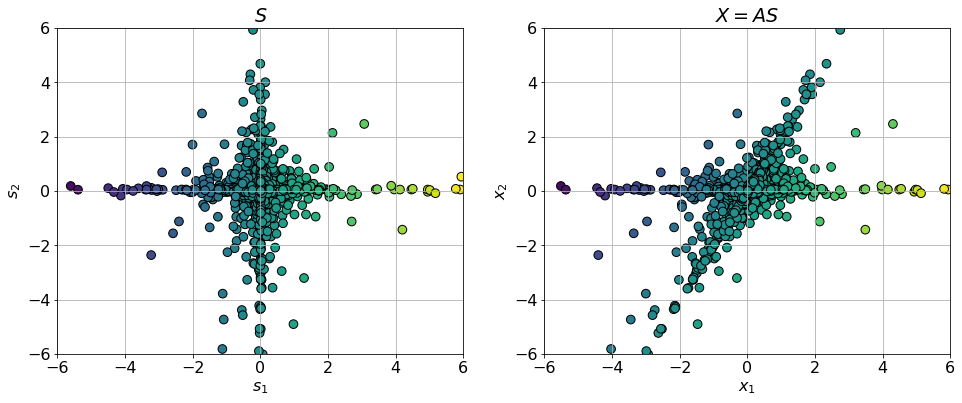

In [6]:
L      = 6
vColor = mS[0,:].copy()
vColor[vColor >  L] =  L
vColor[vColor < -L] = -L

_, vAxes = plt.subplots(1, 2, figsize=(16, 6))
vAxes[0].scatter   (mS[0,:], mS[1,:], s=75, c=vColor, edgecolor='k')
vAxes[0].axis      ([-L, L, -L, L])
vAxes[0].grid      ()
vAxes[0].set_xlabel('$s_1$')
vAxes[0].set_ylabel('$s_2$')
vAxes[0].set_title ('$S$')

vAxes[1].scatter   (mX[0,:], mX[1,:], s=75, c=vColor, edgecolor='k')
vAxes[1].axis      ([-L, L, -L, L])
vAxes[1].grid      ()
vAxes[1].set_xlabel('$x_1$')
vAxes[1].set_ylabel('$x_2$')
vAxes[1].set_title ('$X=AS$')

plt.show()

#### Apply (fast) ICA:

In [7]:
from sklearn.decomposition import FastICA

mY  = FastICA().fit_transform(mX.T).T #-- norm is 1
mY *= np.sqrt(N)                      #-- std  is 1

#### Plot results:

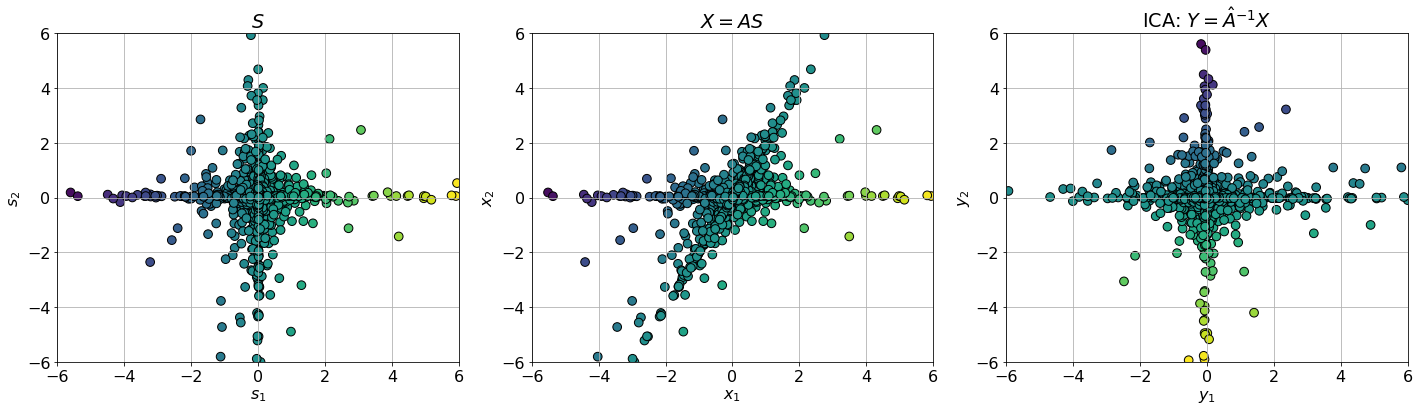

In [8]:
_, vAxes = plt.subplots(1, 3, figsize=(20, 6))
vAxes[0].scatter   (mS[0,:], mS[1,:], s=75, c=vColor, edgecolor='k')
vAxes[0].axis      ([-L, L, -L, L])
vAxes[0].set_title ('$S$')
vAxes[0].set_xlabel('$s_1$')
vAxes[0].set_ylabel('$s_2$')
vAxes[0].grid      ()

vAxes[1].scatter   (mX[0,:], mX[1,:], s=75, c=vColor, edgecolor='k')
vAxes[1].axis      ([-L, L, -L, L])
vAxes[1].set_title ('$X=AS$')
vAxes[1].set_xlabel('$x_1$')
vAxes[1].set_ylabel('$x_2$')
vAxes[1].grid      ()

vAxes[2].scatter   (mY[0,:], mY[1,:], s=75, c=vColor, edgecolor='k')
vAxes[2].axis      ([-L, L, -L, L])
vAxes[2].set_title ('ICA: $Y=\hat{A}^{-1}X$')
vAxes[2].set_xlabel('$y_1$')
vAxes[2].set_ylabel('$y_2$')
vAxes[2].grid      ()

plt.tight_layout()
plt.show()

### Example II
#### Generate data
Generate `N=2,000` realizations from 
$$\underline{X}=\boldsymbol{A}\underline{S}$$
where
$$\boldsymbol{A}=\left[\begin{matrix}1 & 1 & 1\\
\frac{1}{2} & 2 & 1\\
\frac{3}{2} & 1 & 2
\end{matrix}\right]$$

In [9]:
from scipy import signal

N    = 2000
t    = np.linspace(0, 8, N)
vS1  = np.sin(2 * t)
vS2  = np.sign(np.sin(3 * t))
vS3  = signal.sawtooth(2 * np.pi * t)
mS   = np.c_[vS1, vS2, vS3]
mS  += 0.1 * np.random.randn(*mS.shape)

mS -= mS.mean(0)
mS /= mS.std (0)

mA = np.array([[1,   1, 1],
               [0.5, 2, 1],
               [1.5, 1, 2]])
mX = mS @ mA

mS.shape, mA.shape, mX.shape

((2000, 3), (3, 3), (2000, 3))

#### Plot data:

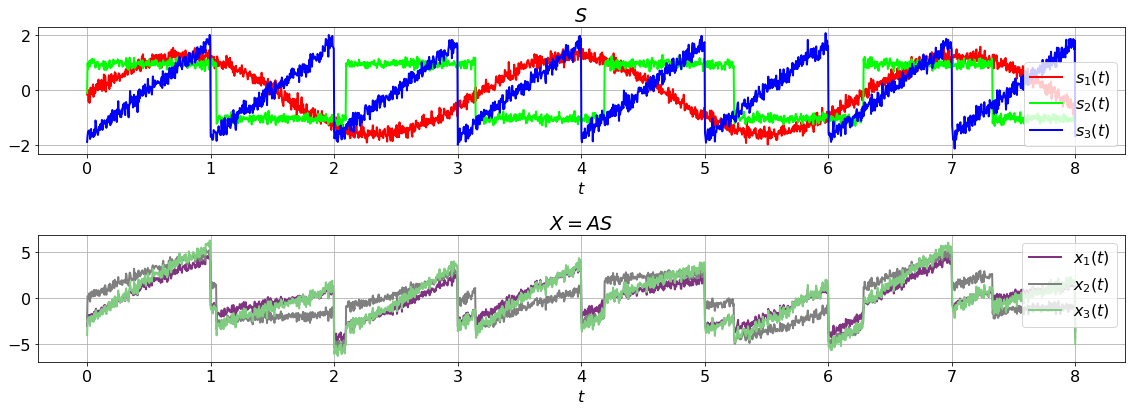

In [10]:
_, vAxes = plt.subplots(2, 1, figsize=(16, 6))
vAxes[0].plot      (t, mS[:,0], c='r',     lw=2, label='$s_1(t)$')
vAxes[0].plot      (t, mS[:,1], c=[0,1,0], lw=2, label='$s_2(t)$')
vAxes[0].plot      (t, mS[:,2], c='b',     lw=2, label='$s_3(t)$')
vAxes[0].set_title ('$S$')
vAxes[0].set_xlabel('$t$')
vAxes[0].legend    ()
vAxes[0].grid      ()

vAxes[1].plot      (t, mX[:,0], c=[.5,.2,.5], lw=2, label='$x_1(t)$')
vAxes[1].plot      (t, mX[:,1], c=[.5,.5,.5], lw=2, label='$x_2(t)$')
vAxes[1].plot      (t, mX[:,2], c=[.5,.8,.5], lw=2, label='$x_3(t)$')
vAxes[1].set_xlabel('$t$')
vAxes[1].set_title ('$X=AS$')
vAxes[1].legend    ()
vAxes[1].grid      ()

plt.tight_layout()
plt.show()

#### Apply (fast) ICA:

In [11]:
from sklearn.decomposition import FastICA

mY  = FastICA().fit_transform(mX)
mY *= np.sqrt(N)

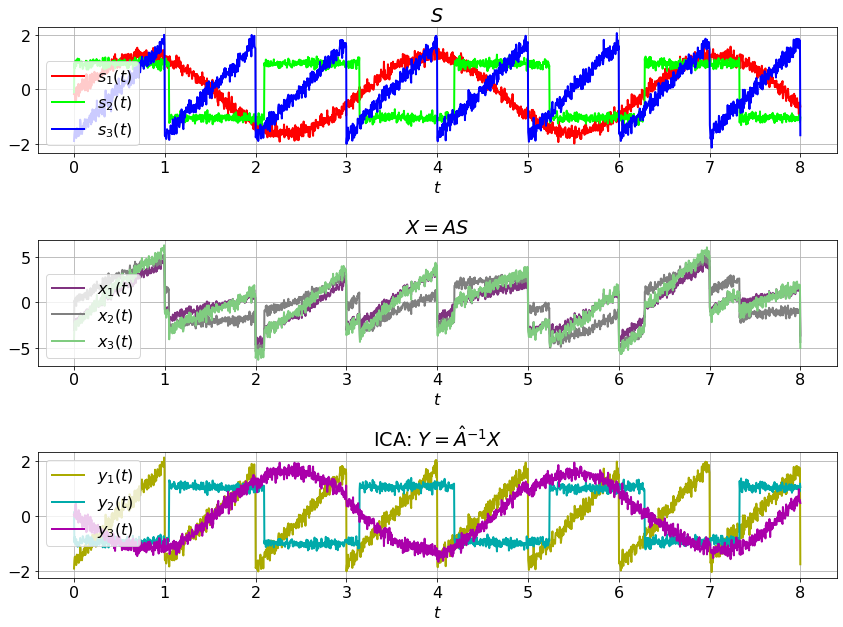

In [12]:
_, vAxes = plt.subplots(3, 1, figsize=(12, 9))

vAxes[0].plot      (t, mS[:,0], c='r',     lw=2, label='$s_1(t)$')
vAxes[0].plot      (t, mS[:,1], c=[0,1,0], lw=2, label='$s_2(t)$')
vAxes[0].plot      (t, mS[:,2], c='b',     lw=2, label='$s_3(t)$')
vAxes[0].set_title ('$S$')
vAxes[0].set_xlabel('$t$')
vAxes[0].legend    ()
vAxes[0].grid      ()

vAxes[1].plot      (t, mX[:,0], c=[.5,.2,.5], lw=2, label='$x_1(t)$')
vAxes[1].plot      (t, mX[:,1], c=[.5,.5,.5], lw=2, label='$x_2(t)$')
vAxes[1].plot      (t, mX[:,2], c=[.5,.8,.5], lw=2, label='$x_3(t)$')
vAxes[1].set_xlabel('$t$')
vAxes[1].set_title ('$X=AS$')
vAxes[1].legend    ()
vAxes[1].grid      ()

vAxes[2].plot      (t, mY[:,0], c=[2/3,2/3,0], lw=2, label='$y_1(t)$')
vAxes[2].plot      (t, mY[:,1], c=[0,2/3,2/3], lw=2, label='$y_2(t)$')
vAxes[2].plot      (t, mY[:,2], c=[2/3,0,2/3], lw=2, label='$y_3(t)$')
vAxes[2].set_xlabel('$t$')
vAxes[2].set_title ('ICA: $Y=\hat{A}^{-1}X$')
vAxes[2].legend    ()
vAxes[2].grid      ()

plt.tight_layout()
plt.show()

### Exercise
* Use `scipy.io.wavfile.read` to read the files `X1.wav` and `X2.wav` (also listen to them).  
* Use `FastICA` to separate the two sources.
* Normalize the outputs so that the `std` will be about `0.2`.
* Use `scipy.io.wavfile.write` to write the output files.
* Listen to the outputs.

In [24]:
from scipy.io.wavfile import read

Fs, vX1 = read('X1.wav') #-- Fs is the sampling frequency
Fs, vX2 = read('X2.wav')

In [25]:
???

Object `?` not found.


In [26]:
from scipy.io.wavfile import write

write('Y1.wav', Fs, ???)
write('Y2.wav', Fs, ???)

SyntaxError: invalid syntax (<ipython-input-26-c41ba5e5d77e>, line 3)